# Data I/O, Visualization, and Exploratory Data Analysis (EDA) 


## Data I/O

Data is going to arrive to you in a variety of formats.\
You may well have to write custom to code to read in your data, if you are usually specialized hardware like EEG. \
But usually, you can find a library somewhere that will help you. 

### MATLAB (.mat) hdf5 storage 

One case of particular interest for your projects may be reading in from matlab's native format (.mat). \
I am a fan of this format for neuroscience data, and later in the class we will likely use it. \
Its not actually a Matlab format but a database format called hdf5. 

There are some readers built in to the `scipy` module but they dont ready hdf5 which is the modern .mat format. 

To be able to read these in, I recommend you use the `hdf5storage` module which you can install with **pip**. \
Its the only module that I find cleanly writes files that can be read and written by python and matlab. 

Usually, when you install something with you should create a new environment first. \
I am so sure of `hdf5storage`, I install it in base.

    (base) $ pip install hdf5storage 

If you want to learn how to use environments read the anaconda docs. \
here is a quick way to make an environment called `newenv` activate it and install something with `pip` 

    (base) $ conda create --clone base --name newenv
    (base) $ conda activate newenv
    (newenv) $ pip install hdf5storage 

### pickle files 
Python's native file format .pkl, is good for personal use, but not for sharing.

### csv, xls files 

Probably the most common files for data science applications, and the `pandas` module provides great tools for interacting with them. 


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Let´s use a different dataset

We will load an already known dataset.

Source: https://www.kaggle.com/spscientist/students-performance-in-exams  
Original source generator: http://roycekimmons.com/tools/generated_data/exams

If you go to the original source you will find this is a fictitious dataset created specifically for data science training purposes.

In [3]:
df = pd.read_csv('data/StudentsPerformance.csv').rename(
        columns={
            'race/ethnicity': 'group',
            'parental level of education': 'parental',
            'test preparation course': 'course',
            'math score': 'math',
            'reading score': 'reading',
            'writing score': 'writing'
        }
    )

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   gender    1000 non-null   object
 1   group     1000 non-null   object
 2   parental  1000 non-null   object
 3   lunch     1000 non-null   object
 4   course    1000 non-null   object
 5   math      1000 non-null   int64 
 6   reading   1000 non-null   int64 
 7   writing   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Some questions:**
- Does gender affect math scores?
- Do math scores affect gender? 
- Does reading and writing scores affect math scores? 
- Do math scores affect reading and writing scores? 
- Does a group perform better at math than the rest?
- Does parental level education affect math scores?

In [39]:
df.head()

,gender,group,parental,lunch,course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Let's simplify the dataframe

We can simplify the group values to the group letter

**Series.str**

[`Series.str`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.html): Vectorized string functions for Series and Index.

In [41]:
df['group'] = df['group'].str[-1]
df['group'].unique().tolist()

['B', 'C', 'A', 'D', 'E']

In [42]:
df.head()

,gender,group,parental,lunch,course,math,reading,writing
0,female,B,bachelor's degree,standard,none,72,72,74
1,female,C,some college,standard,completed,69,90,88
2,female,B,master's degree,standard,none,90,95,93
3,male,A,associate's degree,free/reduced,none,47,57,44
4,male,C,some college,standard,none,76,78,75


In [43]:
df['course'].unique()

array(['none', 'completed'], dtype=object)

In [45]:
df.head()

,gender,group,parental,lunch,course,math,reading,writing
0,female,B,bachelor's degree,standard,False,72,72,74
1,female,C,some college,standard,True,69,90,88
2,female,B,master's degree,standard,False,90,95,93
3,male,A,associate's degree,free/reduced,False,47,57,44
4,male,C,some college,standard,False,76,78,75


You can also take a look at a random sample 

In [6]:
df.sample(5)

,gender,group,parental,lunch,course,math,reading,writing
900,male,group D,master's degree,standard,none,85,84,89
469,male,group C,some college,standard,none,91,74,76
80,female,group B,associate's degree,standard,none,47,49,50
68,male,group B,associate's degree,free/reduced,none,61,58,56
359,female,group D,some college,standard,none,80,90,89


Or a random sample of specific variables. 

In [7]:
df[['reading','math']].sample(5)

,reading,math
965,70,62
281,48,45
536,60,51
3,57,47
625,97,100


## Missing values

gender      0
group       0
parental    0
lunch       0
course      0
math        0
reading     0
writing     0
dtype: int64

None of the column series present missing values
Im going to make missing values using `iloc` to index into the dataframe

In [ ]:
# 'poking holes' in the data
df.iloc[0,5] = None
df.iloc[2,2] = None

In [ ]:
df.isna().head()

,gender,race,peduc,lunch,course,math,reading,writing
301,False,False,False,False,False,True,False,False
895,False,False,False,False,False,False,False,False
763,False,False,True,False,False,False,False,False
854,False,False,False,False,False,False,False,False
49,False,False,False,False,False,False,False,False


In [ ]:
resultE = df.isna().sum()
display(resultE)

gender     0
race       0
peduc      1
lunch      0
course     0
math       1
reading    0
writing    0
dtype: int64

**Data Imputation**

I denounce this. 

In [ ]:
df['math'] = df['math'].fillna(df['math'].mean())
df.head()

,gender,race,peduc,lunch,course,math,reading,writing
301,male,group D,some high school,free/reduced,none,66.099099,54,52
895,female,group E,some high school,free/reduced,none,32.000000,34,38
763,female,group B,None,standard,none,62.000000,62,63
854,male,group C,some high school,standard,none,62.000000,64,55
49,male,group C,high school,standard,completed,82.000000,84,82


**Remove Data** 

**Solution**

In [ ]:
df = df.dropna()
df.head()

,gender,race,peduc,lunch,course,math,reading,writing
301,male,group D,some high school,free/reduced,none,66.099099,54,52
895,female,group E,some high school,free/reduced,none,32.000000,34,38
854,male,group C,some high school,standard,none,62.000000,64,55
49,male,group C,high school,standard,completed,82.000000,84,82
790,female,group B,high school,standard,none,48.000000,62,60


You can also look for not missing data, but red flag values.

Its pretty unlikely someone got a zero if they actually took a test. 

It's not common at all to see a zero on scores. Here we see a 0 found at math

In [ ]:
df[df['math'] == 0]

,gender,group,parental,lunch,course,math,reading,writing
59,female,group C,some high school,free/reduced,none,0,17,10


Something is wrong with this sample and you might want to drop it using the `.drop` method. 

Here I make a copy to df2 excluding this data.  

In [ ]:
df2 = df.drop(59,axis = 'index')

In [ ]:
df2[df2['math'] == 0]

,gender,group,parental,lunch,course,math,reading,writing


## Descriptive Statistics 

You can quickly grab descriptive statistics using `describe`

In [8]:
df.describe()

,math,reading,writing
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


You can also ask for a specific variable(s). 

In [9]:
df[['reading']].describe()

,reading
count,1000.000000
mean,69.169000
std,14.600192
min,17.000000
25%,59.000000
50%,70.000000
75%,79.000000
max,100.000000


### Categorical Columns - nunique() and unique()

In [ ]:
df['gender'].unique().tolist()

['male', 'female']

The trouble with unique is you can use it on continuous variables which is useless. 

In [20]:
def print_uniques(df, col, limit=10):
    """Print column's uniques values when the number of column's uniques is lower or equal than limit """
    n = df[col].nunique()
    if n <= limit:
        print(f'{col}:', df[col].unique().tolist())
    else:
        print(f'{col}:', f'more than {limit} uniques')

for col in df.columns: #(df. columns is all the columns)
    print_uniques(df, col)

gender: ['female', 'male']
group: ['group B', 'group C', 'group A', 'group D', 'group E']
parental: ["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']
lunch: ['standard', 'free/reduced']
course: ['none', 'completed']
math: more than 10 uniques
reading: more than 10 uniques
writing: more than 10 uniques


## Visualization

#### Histograms

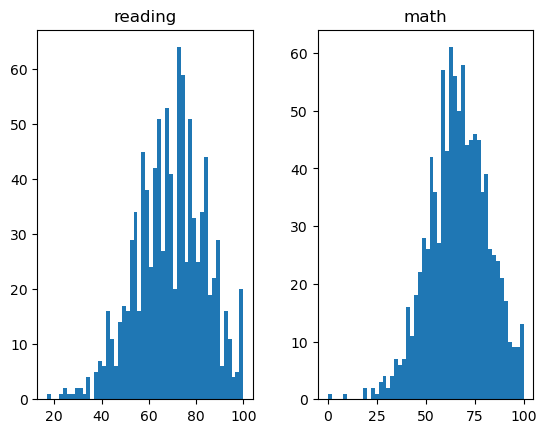

In [16]:
df[['reading', 'math']].hist(bins=50, grid=False);

#### Histograms for our selected variables (seaborn)

[seaborn.histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html)

We can plot histogram in different plots using matplotlib subplots

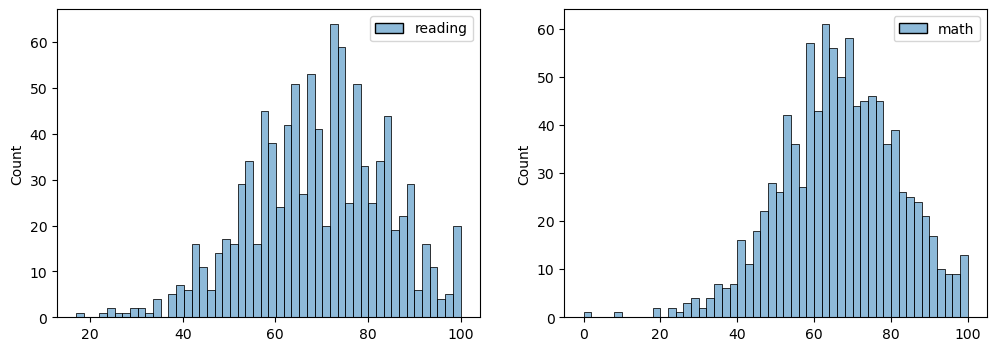

In [18]:
plt.figure(figsize=(12,4))
sns.histplot(df[['reading']], bins=50, ax=plt.subplot(121))
sns.histplot(df[['math']], bins=50, ax=plt.subplot(122));

#### Kernel Density Estimate

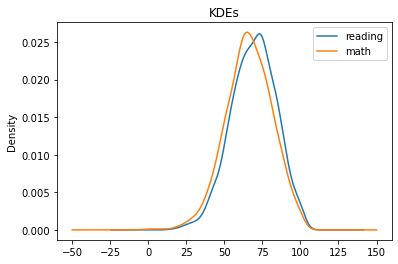

In [53]:
df[['reading', 'math']].plot.kde()
plt.title('KDEs');

#### BoxPlot

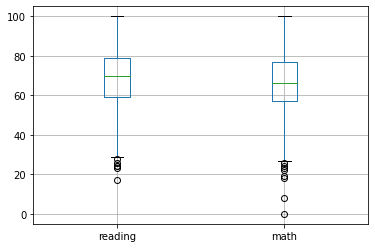

In [55]:
df[['reading', 'math']].boxplot();

At first glance distributions looks similar as one could expect. Math scores distribution looks a bit shifted down.

**Boxplots with seaborn**

[`seanborn.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

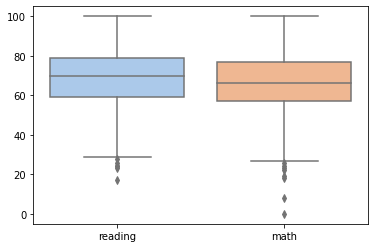

In [56]:
sns.boxplot(data=df[['reading', 'math']], palette=palette);

**Violinplots**

[`seaborn.violinplot()`](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

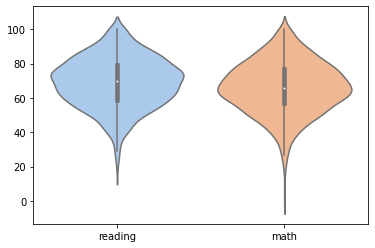

In [58]:
sns.violinplot(data=df[['reading', 'math']], palette=palette);



What about the relation between the scores? Do they interact?
#### Scatter to the rescue

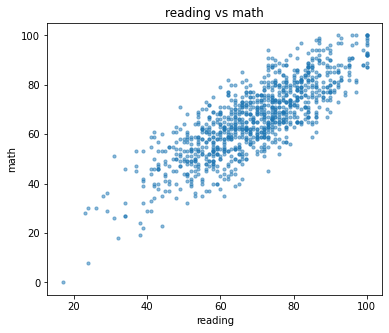

In [59]:
df.plot.scatter(x='reading', y='math', s=10, alpha=.5, figsize=(6,5))
plt.title('reading vs math');

There is visual correlation between these variables.

### Correlation
Pandas has implemented a method named `corr()`.

`DataFrame.corr()`: Compute pairwise correlation of columns, excluding NA/null values.
```python
DataFrame.corr(method='pearson', min_periods=1)
```


In [60]:
df[['reading', 'math']].corr()

,reading,math
reading,1.00000,0.81758
math,0.81758,1.00000


Pandas corr() offers different correlation methods. In most cases `pearson` or/and `spearman` are the methods to go.

In [61]:
for method in ['pearson', 'kendall', 'spearman']:
    # iloc is used to access value at first row second column.
    corr = df[['reading', 'math']].corr(method=method).iloc[0,1]
    print(f'{method} correlation: {corr:.3f}')

pearson correlation: 0.818
kendall correlation: 0.617
spearman correlation: 0.804


We've confirmed there is a strong (linear) correlation between reading and math scores. Each variable could work as a proxy of the other variable.

#### Boxplot on the whole dataframe

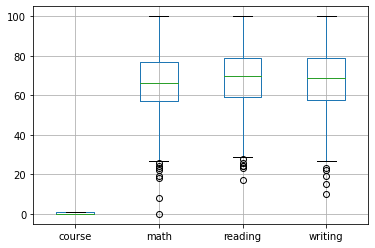

In [62]:
df.boxplot();

#### Correlation between all variables

In [63]:
df.corr()

,course,math,reading,writing
course,1.000000,0.177702,0.241780,0.312946
math,0.177702,1.000000,0.817580,0.802642
reading,0.241780,0.817580,1.000000,0.954598
writing,0.312946,0.802642,0.954598,1.000000


Reading and writing have a really strong correlation.

**Of course one could use plots**

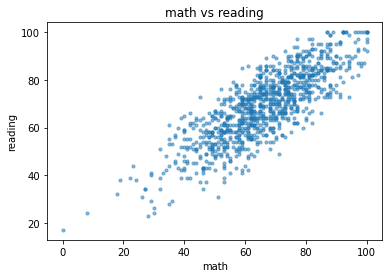

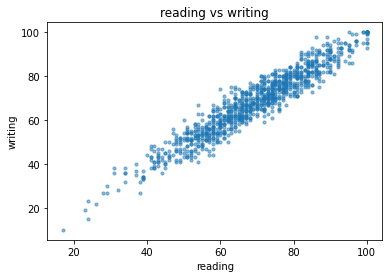

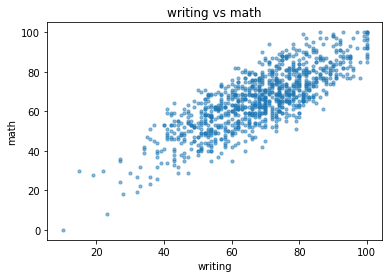

In [64]:
cols = ['math', 'reading', 'writing']
for i, c1 in enumerate(cols):
    c2 = cols[i+1] if i < len(cols)-1 else cols[0]
    df.plot.scatter(x=c1, y=c2, s=10, alpha=.5)
    plt.title(f'{c1} vs {c2}')

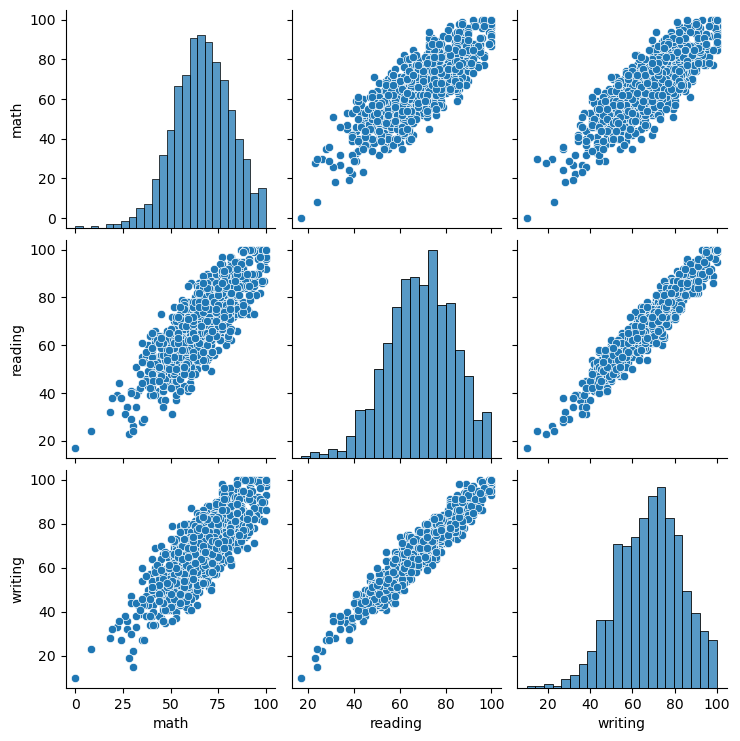

In [24]:
sns.pairplot(df)
plt.show()

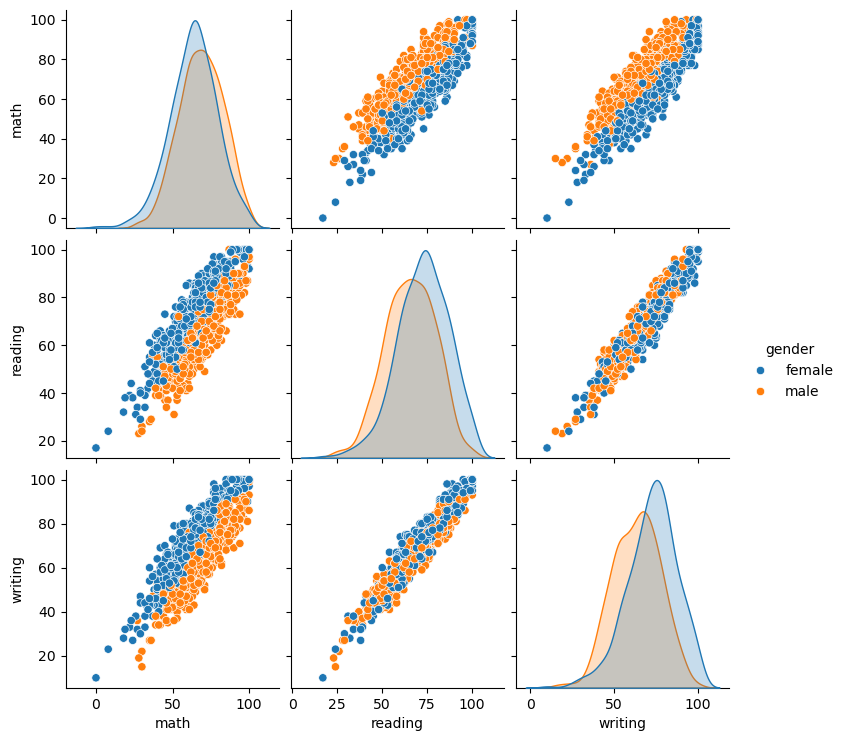

In [22]:
sns.pairplot(df, hue='gender');

In [69]:
df.groupby('gender').mean()

,course,math,reading,writing
gender,,,,
female,0.355212,63.633205,72.608108,72.467181
male,0.360996,68.728216,65.473029,63.311203


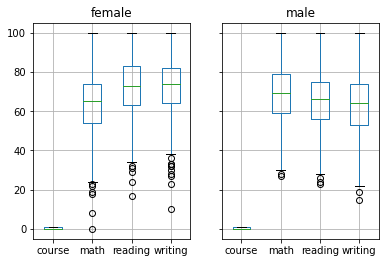

In [70]:
df.groupby('gender').boxplot();

#### One Hot Encoding

Machine Learning with never be cool. 

In [78]:
pd.get_dummies(df['gender']).head()

,female,male
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


In example, we could make use of this method to create a new DataFrame with the scores and the one hot encoded version of gender variable. We use `get_dummies()` to encode the categorical gender variable and then we use the `pd.concat()` method to concatenate two DataFrames on the horizonal axis.

In [79]:
df_encoded = pd.concat([df[['math', 'reading', 'writing']], pd.get_dummies(df['gender'])], axis=1)
df_encoded.head()

,math,reading,writing,female,male
0,72,72,74,1,0
1,69,90,88,1,0
2,90,95,93,1,0
3,47,57,44,0,1
4,76,78,75,0,1


And then using one line of code more we could arrive to the same conclusions

# Summary

**In this lecture you've learnt:**

### <center>Some important things about using SEABORN with PANDAS!</center>


- Importance of plots
- Using pandas for EDA
- Notion of One Hot Encoding

**Pandas**
- pandas.read_csv()
- pandas.concat()
- pandas.get_dummies()
- DataFrame.info()
- DataFrame.head()
- DataFrame.sample()
- DataFrame.describe()
- DataFrame.unique()
- DataFrame.str
- DataFrame.grouby()
- DataFrame.sourt_values()
- DataFrame.corr()
- DataFrame.corrwith()
- DataFrameGroupBy.size()

**Pandas (plotting)**
- DataFrame.boxplot()
- DataFrame.hist()
- DataFrame.plot()
- DataFrame.plot.kde()
- DataFrame.plot.pie()
- DataFrame.plot.scatter()

**matplotlib**
- matplotlib.pyplot.subplots()
- matplotlib.pyplot.title()
- matplotlib.pyplot.plot()
- matplotlib.pyplot.suptitle()
- matplotlib.pyplot.subplot()
- matplotlib.pyplot.subplots_adjust()
- matplotlib.pyplot.ylabel()
- matplotlib.pyplot.legend()
- matplotlib.pyplot.figure()

**seaborn**
- seaborn.boxplot()
- seaborn.boxenplot()
- seaborn.histplot()
- seaborn.barplot()
- seaborn.countplot()
- seaborn.scatterplot()
- seaborn.violinplot()
- seaborn.lineplot()
- seaborn.pairplot()
- seaborn.heatmap()
- seaborn.kdeplot()
- seaborn.FacetGrid()
- seaborn.PairGrid()